In [31]:
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn.model_selection import GridSearchCV

from sklearn import tree


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

# Data upload

In [92]:
df = pd.read_csv("../data/ML/df_final.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Population,Number of Referrals,Tenure in Months,Offer,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,0,Los Angeles,68701,0,1,None,...,20,0.00,59.65,3,Churned,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,Yes,1,Los Angeles,55668,1,8,Offer E,...,0,390.80,1024.10,3,Churned,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,3,Los Angeles,47534,0,18,Offer D,...,0,203.94,1910.88,2,Churned,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,Yes,1,Inglewood,27778,1,25,Offer C,...,0,494.00,2995.07,2,Churned,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,Yes,1,Whittier,26265,1,37,Offer C,...,0,234.21,3102.36,2,Churned,1,67,2793,Price,Extra data charges


# EDA

In [93]:
# How many rows and columns we have
df.shape

(7043, 40)

In [94]:
# How many null values do we have in the dataset
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Population                              0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                    

In [95]:
df["Churn Category"].unique()

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude', nan],
      dtype=object)

In [96]:
df["Churn Reason"].unique()

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', nan,
       'Lack of self-service on Website'], dtype=object)

- We will remove from our dataset the clients who have died and those who have moved since it does not provide relevant information since their stay in the company does not depend on what we offer them but rather on external personal situations

In [97]:
df= df.loc[(df['Churn Reason']!="Moved")  & (df['Churn Reason']!="Deceased") ]

In [98]:
df.shape

(6991, 40)

In [100]:
# we remove irrelevant columns
df.drop(columns=["Customer ID","Churn Category","Churn Reason","Population","City"], axis=1, inplace=True)

# Response variables

- 1 (Yes): the client stayed in the company
- 0 (No) : the client left the company

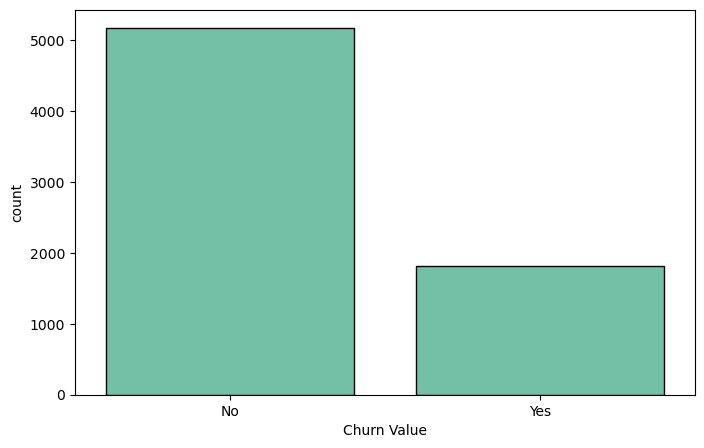

In [102]:
#create a countplot using the Seaborn library to see the dimension of the response variables 

plt.figure(figsize=(8,5)) # Change the size 

fig1 = sns.countplot(data = df, x = "Churn Value",  color = "mediumaquamarine",  edgecolor='black'); 
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

In [103]:
df["Churn Value"].value_counts() / df.shape[0]


0    0.740094
1    0.259906
Name: Churn Value, dtype: float64

# Predictor variables

## Categorical variables


In [104]:
df_categoricas=df.select_dtypes(include = "object")

In [106]:
df_categoricas.columns

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status'],
      dtype='object')

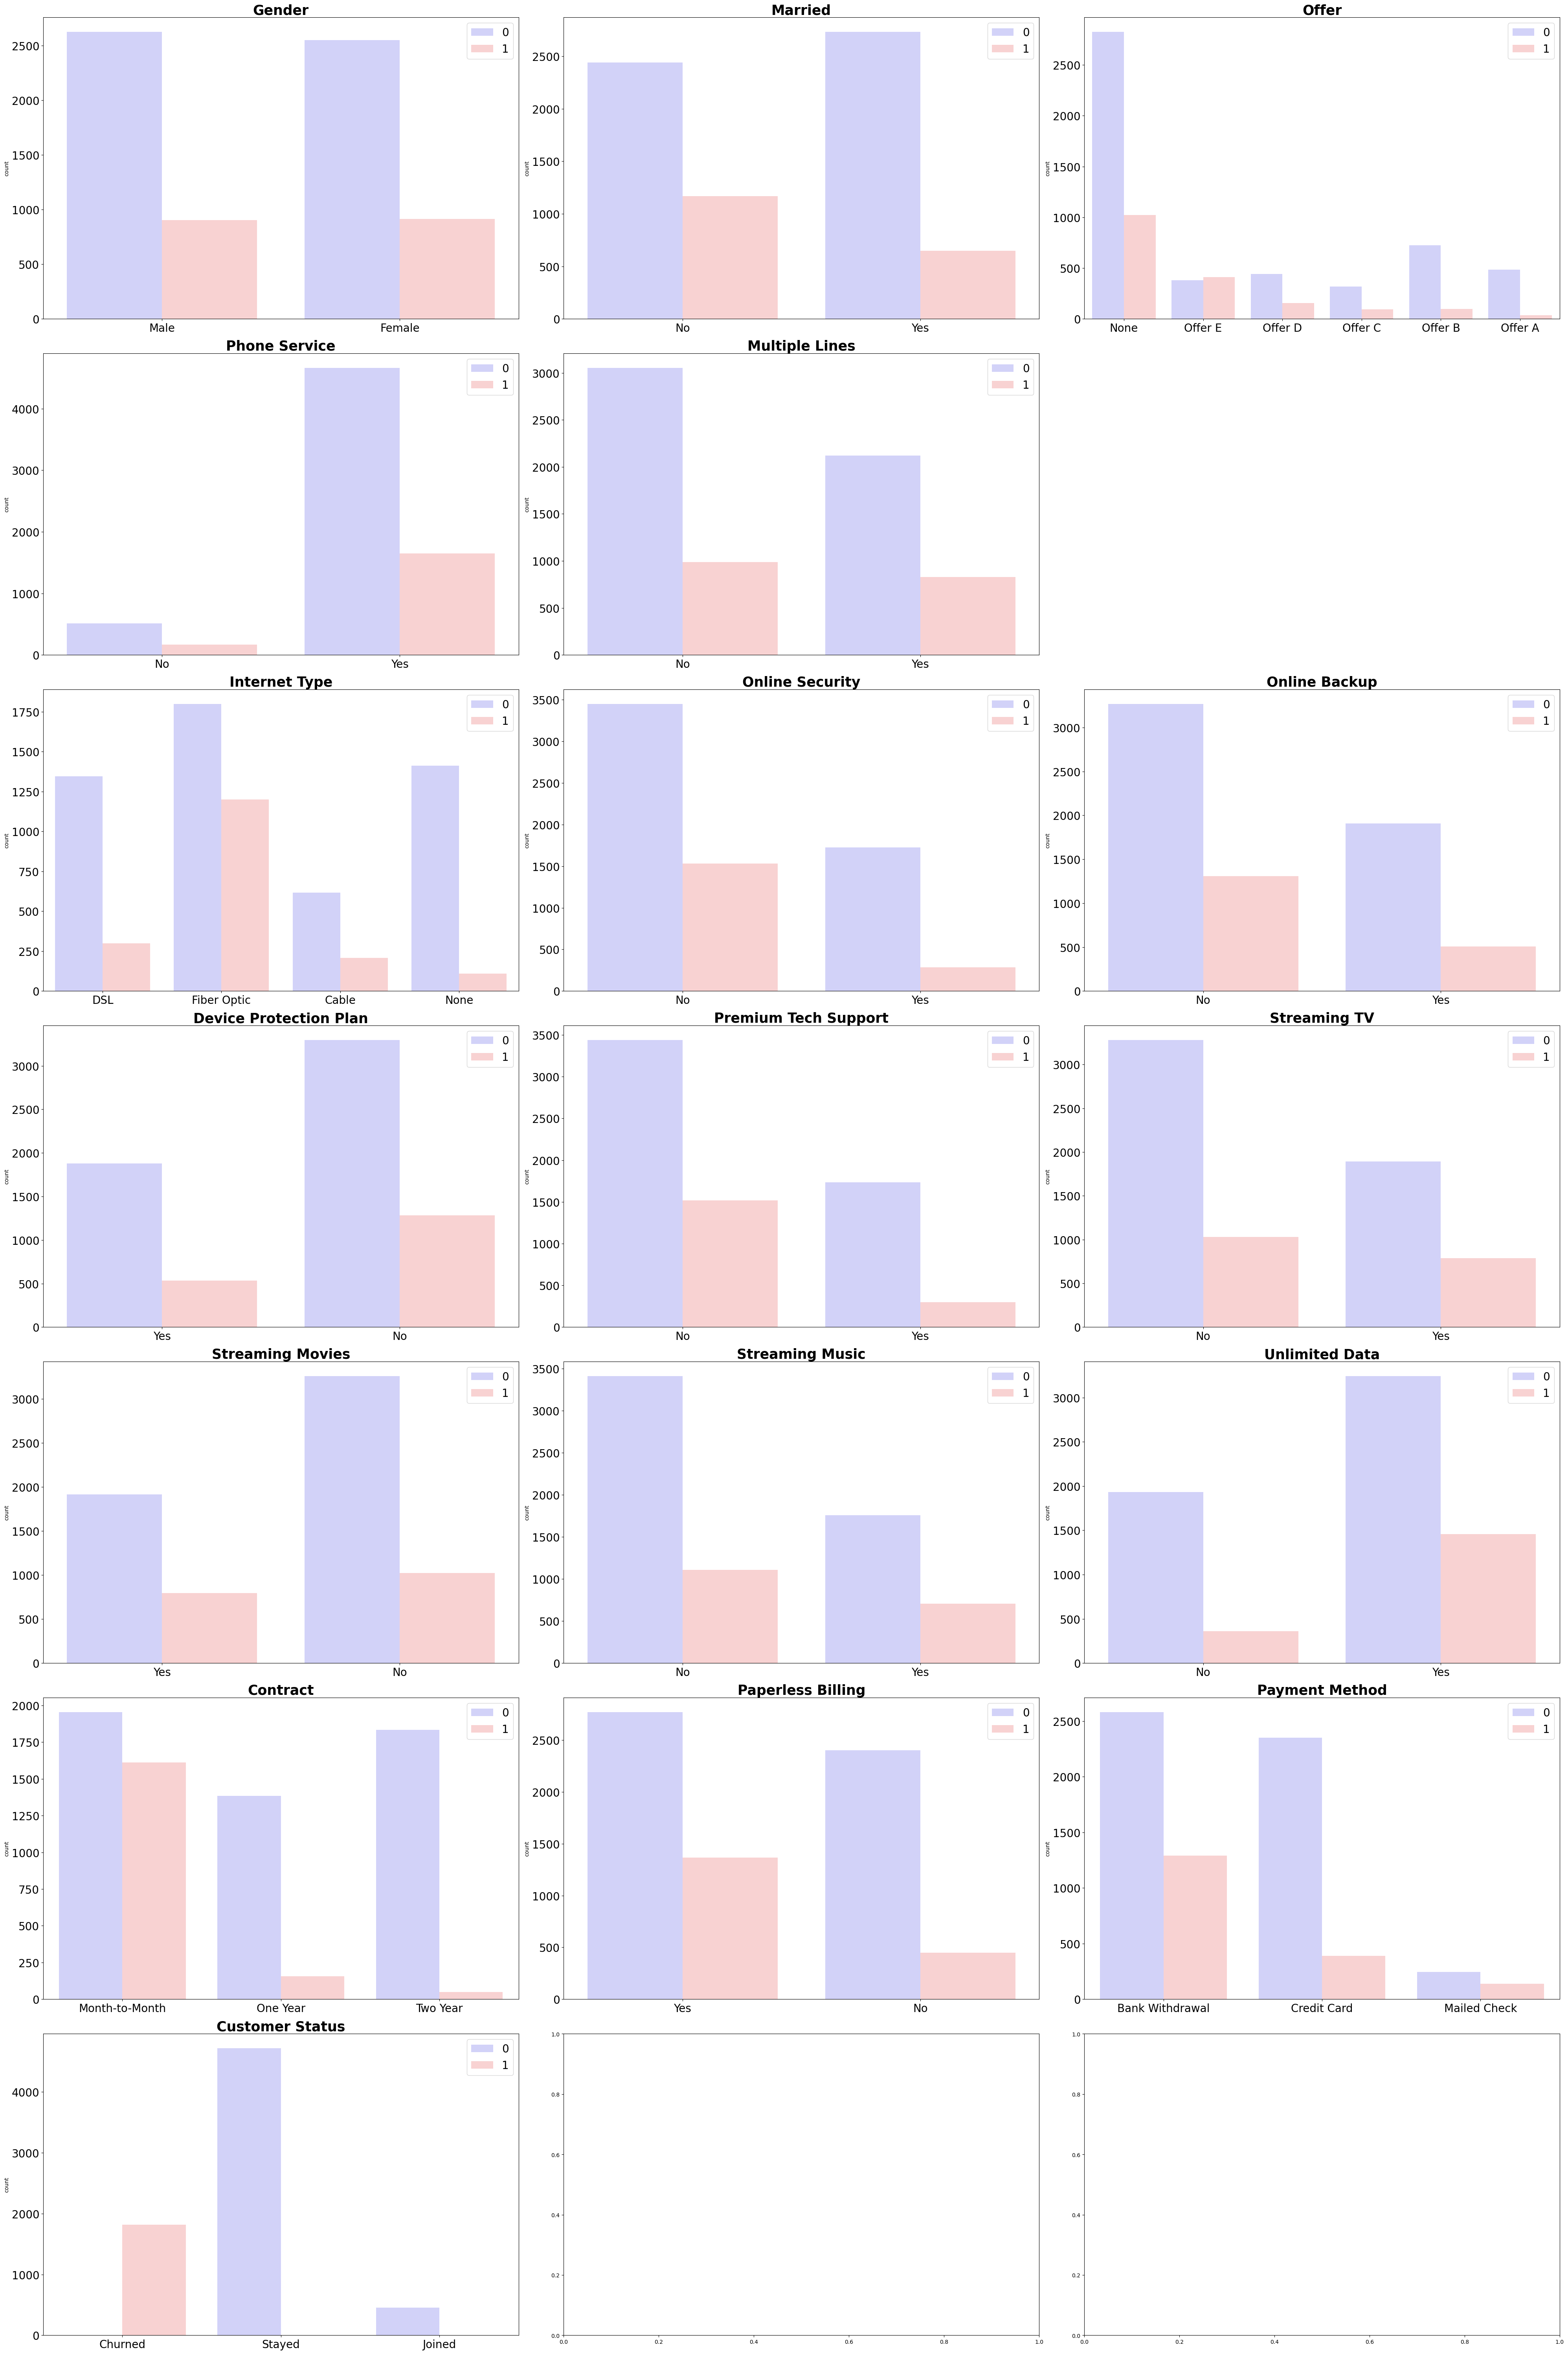

In [107]:
# Distribution graph for each categorical variable according to the response variables
# ==============================================================================

fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize = (40, 60))

axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Churn Value",
        alpha = 0.2,
        palette = ["blue", "red"], # change the colors to blue and black
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(fontsize=20) # increase the size of the legend

fig.delaxes(axes[5])
fig.tight_layout()


In [108]:
df_categoricas["Customer Status"].unique()

array(['Churned', 'Stayed', 'Joined'], dtype=object)

- "Churned" means that the client has abandoned the service.
- "Stayed" means that the client has remained in the service.
- "Joined" means that the customer has recently purchased the service.

In [36]:
## we remove the Customer Status column because it does not give us any relevant information by comparing it with the response variable

df.drop(columns=["Customer Status"], axis=1, inplace=True)

## Numeric variables

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (100, 70))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Churn Value")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        color = "blue",
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 35, fontweight = "bold")
    axes[i].tick_params(labelsize = 50)
    axes[i].set_xlabel("")
    


fig.delaxes(axes[5])

fig.tight_layout();


In [ ]:
df_numericas = df.select_dtypes(include = np.number).drop("Churn Value", axis = 1)
correlation = df_numericas.corr()

In [ ]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral

- Total Revenue es el conjunto de todas estas columnas: 
    - Avg Monthly Long Distance Charges
    - Monthly Charge
    - Total Charges
    - Total Refunds
    - Total Extra Data Charges
    - Total Long Distance Charges

In [37]:
df.drop(columns=["Avg Monthly Long Distance Charges","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges"], axis=1, inplace=True)

In [ ]:
df_numericas2 = df.select_dtypes(include = np.number)
correlation2 = df_numericas2.corr()

In [ ]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation2, dtype=bool))
sns.heatmap(correlation2, cmap="viridis", annot = True, mask = mask); #barra lateral

 - "Churn Score" está directamente relaionado con la variable respuesta 
 - "Ternure in months" está directamente relacionado con "Ternure Revenue" ya que entre más tiempo haya estado el cliente en la empresa más dinero en ganancias da a la empresa , puest que tienen más servicios contratados 

In [38]:
df.drop(columns=["Churn Score","Tenure in Months"], axis=1, inplace=True)

In [ ]:
df_numericas3 = df.select_dtypes(include = np.number)
correlation3 = df_numericas3.corr()

In [ ]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation3, dtype=bool))
sns.heatmap(correlation3, cmap="viridis", annot = True, mask = mask); #barra lateral

# Preprocesamiento


## Outliers


In [ ]:
df_numericas3.head(1)

In [ ]:
df_numericas_1= df_numericas3.copy()

In [ ]:
df_numericas_1.drop(columns=["Churn Value","Number of Dependents","Number of Referrals"], axis=1, inplace=True)

In [ ]:
df_numericas_1.head(1)

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(30,35))

for i in range(len(df_numericas_1.columns)):
    sns.boxplot(x=df_numericas_1.columns[i], data=df_numericas_1, ax=ax[i])
    ax[i].set_xlabel(df_numericas_1.columns[i], fontsize=20)
    
plt.show()


In [ ]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [ ]:
df_numericas_1.describe().T

# Estandarización 

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (100, 70))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Churn Value")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        color = "blue",
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 35, fontweight = "bold")
    axes[i].tick_params(labelsize = 50)
    axes[i].set_xlabel("")
    


fig.delaxes(axes[5])

fig.tight_layout();


In [ ]:
dfed.head()

# Codificación

In [26]:
import pickle

In [ ]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (40, 60))

axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Churn Value",
        alpha = 0.2,
        palette = ["blue", "red"], # cambia los colores a azul y negro
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(fontsize=20) # aumenta el tamaño de la leyenda

fig.delaxes(axes[5])
fig.tight_layout()


## Variables sin orden

In [39]:
print(' Gender, tiene', df['Gender'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Multiple Lines has', df['Multiple Lines'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Streaming TV has', df['Streaming TV'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Streaming Music has', df['Streaming Music'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Streaming Movies has', df['Streaming Movies'].unique(), 'categorias')

 Gender, tiene ['Male' 'Female'] categorias
---------------------------------------------------------------------------
Multiple Lines has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Streaming TV has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Streaming Music has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Streaming Movies has ['Yes' 'No'] categorias


### one hot encoding : valores binarios 

In [40]:
def one_hot_encoder(dff, columnas):
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    with open(f'../data/ML/pkl/encoding{columnas[0]}.pkl', 'wb') as s:
        pickle.dump(oh, s)
    
    return dff

In [41]:
# Restablecer el índice del DataFrame
df.reset_index(drop=True, inplace=True)

In [43]:
df.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Total Revenue', 'Satisfaction Score', 'Churn Value',
       'CLTV'],
      dtype='object')

In [44]:
df= one_hot_encoder(df, ["Gender"])
df= one_hot_encoder(df, ["Multiple Lines"])
df= one_hot_encoder(df, ["Streaming TV"])
df= one_hot_encoder(df, ["Streaming Music"])
df= one_hot_encoder(df, ["Streaming Movies"])

In [45]:
df.head(1)

,Age,Married,Number of Dependents,Number of Referrals,Offer,Phone Service,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,...,Gender_Female,Gender_Male,Multiple Lines_No,Multiple Lines_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Music_No,Streaming Music_Yes,Streaming Movies_No,Streaming Movies_Yes
0,78,No,0,0,None,No,Yes,DSL,8,No,...,0,1,1,0,1,0,1,0,0,1


## Variables con orden

In [46]:
# Chequeamos valores únicos

print(' Married, tiene', df['Married'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Offer has', df['Offer'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Phone Service has', df['Phone Service'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Internet Type has', df['Internet Type'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Online Security has', df['Online Security'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Online Backup has', df['Online Backup'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Device Protection Plan has', df['Device Protection Plan'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Premium Tech Support has', df['Premium Tech Support'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Unlimited Data has', df['Unlimited Data'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Contract has', df['Contract'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Paperless Billing', df['Paperless Billing'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Payment Method has', df['Payment Method'].unique(), 'categorias')

 Married, tiene ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Offer has ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A'] categorias
---------------------------------------------------------------------------
Phone Service has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Internet Type has ['DSL' 'Fiber Optic' 'Cable' 'None'] categorias
---------------------------------------------------------------------------
Online Security has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Online Backup has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Device Protection Plan has ['Yes' 'No'] categorias
---------------------------------------------------------------------------
Premium Tech Support has ['No' 'Yes'] categorias
------------------------------------------------------

### Ordinal encoding 

In [ ]:
# definimos el orden que tendra cada categoría 

In [47]:
orden_married=["Yes","No"]
orden_phone_service=["No","Yes"]
orden_internet_type=["None","Cable","DSL","Fiber Optic"]
orden_online_sec=["Yes","No"]
orden_online_backup=["Yes","No"]
orden_device_protection=["Yes","No"]
orden_prem_tech_supp=["Yes","No"]
orden_unlimited_data=["No","Yes"]
orden_paperless_b=["No","Yes"]
orden_payment_method=["Mailed Check","Credit Card","Bank Withdrawal"]

In [49]:
def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    
    with open(f'../data/ML/pkl/encoding{columna}.pkl', 'wb') as s:
        pickle.dump(ordinal, s)
    return df

In [50]:
df = ordinal_encoder(orden_married, df, "Married")
df = ordinal_encoder(orden_phone_service, df, "Phone Service")
df = ordinal_encoder(orden_internet_type, df, "Internet Type")
df = ordinal_encoder(orden_online_sec, df, "Online Security")
df = ordinal_encoder(orden_online_backup, df, "Online Backup")
df = ordinal_encoder(orden_device_protection, df, "Device Protection Plan")
df = ordinal_encoder(orden_prem_tech_supp, df, "Premium Tech Support")
df = ordinal_encoder(orden_unlimited_data, df, "Unlimited Data")
df = ordinal_encoder(orden_paperless_b, df, "Paperless Billing")
df = ordinal_encoder(orden_payment_method, df, "Payment Method")


In [51]:
df.head()

,Age,Married,Number of Dependents,Number of Referrals,Offer,Phone Service,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,...,Gender_Female,Gender_Male,Multiple Lines_No,Multiple Lines_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Music_No,Streaming Music_Yes,Streaming Movies_No,Streaming Movies_Yes
0,78,1,0,0,None,0,Yes,2,8,1,...,0,1,1,0,1,0,1,0,0,1
1,74,0,1,1,Offer E,1,Yes,3,17,1,...,1,0,0,1,1,0,1,0,1,0
2,71,1,3,0,Offer D,1,Yes,3,52,1,...,0,1,0,1,0,1,0,1,0,1
3,78,0,1,1,Offer C,1,Yes,3,12,1,...,1,0,1,0,0,1,1,0,0,1
4,80,0,1,1,Offer C,1,Yes,3,14,1,...,1,0,0,1,1,0,1,0,1,0


In [ ]:
df["Internet Service"].unique()

In [ ]:
df.columns

### Map

In [52]:

print(' Offer, tiene', df['Offer'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Contract has', df['Contract'].unique(), 'categorias')
print("---------------------------------------------------------------------------")

 Offer, tiene ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A'] categorias
---------------------------------------------------------------------------
Contract has ['Month-to-Month' 'One Year' 'Two Year'] categorias
---------------------------------------------------------------------------


In [53]:
mapa_contract = {"Month-to-Month":  1, 
       "One Year": 0, "Two Year":0}

In [54]:
mapa_offer = {"Offer A":  0, "Offer B": 1,"Offer C":1,"Offer D":2,"Offer E":3, "None":4}

In [55]:
def ordinal_map(df, columna, orden_valores):
    ordinal_dict = {}
    
    for i, valor in enumerate(orden_valores):
        ordinal_dict[valor] = i
        
    nuevo_nombre = columna + "_mapeada"
    
    df[nuevo_nombre] = df[columna].map(ordinal_dict)
        
    return df

In [56]:
df = ordinal_map(df, "Contract",mapa_contract)
df = ordinal_map(df, "Offer",mapa_offer)


In [57]:
df.head()

,Age,Married,Number of Dependents,Number of Referrals,Offer,Phone Service,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,...,Multiple Lines_No,Multiple Lines_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Music_No,Streaming Music_Yes,Streaming Movies_No,Streaming Movies_Yes,Contract_mapeada,Offer_mapeada
0,78,1,0,0,None,0,Yes,2,8,1,...,1,0,1,0,1,0,0,1,0,5
1,74,0,1,1,Offer E,1,Yes,3,17,1,...,0,1,1,0,1,0,1,0,0,4
2,71,1,3,0,Offer D,1,Yes,3,52,1,...,0,1,0,1,0,1,0,1,0,3
3,78,0,1,1,Offer C,1,Yes,3,12,1,...,1,0,0,1,1,0,0,1,0,2
4,80,0,1,1,Offer C,1,Yes,3,14,1,...,0,1,1,0,1,0,1,0,0,2


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      6991 non-null   int64  
 1   Married                  6991 non-null   int64  
 2   Number of Dependents     6991 non-null   int64  
 3   Number of Referrals      6991 non-null   int64  
 4   Offer                    6991 non-null   object 
 5   Phone Service            6991 non-null   int64  
 6   Internet Service         6991 non-null   object 
 7   Internet Type            6991 non-null   int64  
 8   Avg Monthly GB Download  6991 non-null   int64  
 9   Online Security          6991 non-null   int64  
 10  Online Backup            6991 non-null   int64  
 11  Device Protection Plan   6991 non-null   int64  
 12  Premium Tech Support     6991 non-null   int64  
 13  Unlimited Data           6991 non-null   int64  
 14  Contract                

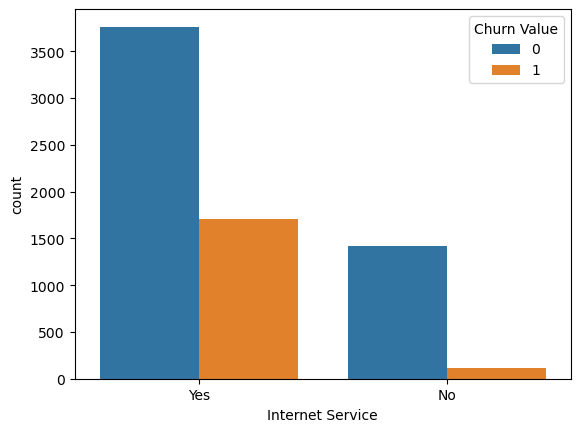

In [59]:
sns.countplot(x='Internet Service', hue='Churn Value', data=df)
plt.show()

In [60]:
df["Internet Serivce"].value_counts

KeyError: 'Internet Serivce'

In [61]:
df_final= df.copy()

In [62]:
df_final.drop(columns=["Internet Service","Offer","Contract"], axis=1, inplace=True)

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      6991 non-null   int64  
 1   Married                  6991 non-null   int64  
 2   Number of Dependents     6991 non-null   int64  
 3   Number of Referrals      6991 non-null   int64  
 4   Phone Service            6991 non-null   int64  
 5   Internet Type            6991 non-null   int64  
 6   Avg Monthly GB Download  6991 non-null   int64  
 7   Online Security          6991 non-null   int64  
 8   Online Backup            6991 non-null   int64  
 9   Device Protection Plan   6991 non-null   int64  
 10  Premium Tech Support     6991 non-null   int64  
 11  Unlimited Data           6991 non-null   int64  
 12  Paperless Billing        6991 non-null   int64  
 13  Payment Method           6991 non-null   int64  
 14  Total Revenue           

In [64]:
df_final.columns

Index(['Age', 'Married', 'Number of Dependents', 'Number of Referrals',
       'Phone Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Unlimited Data', 'Paperless Billing',
       'Payment Method', 'Total Revenue', 'Satisfaction Score', 'Churn Value',
       'CLTV', 'Gender_Female', 'Gender_Male', 'Multiple Lines_No',
       'Multiple Lines_Yes', 'Streaming TV_No', 'Streaming TV_Yes',
       'Streaming Music_No', 'Streaming Music_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Contract_mapeada', 'Offer_mapeada'],
      dtype='object')

In [65]:
len(df_final.columns)

30

In [ ]:
df_final.to_csv('../data/ML/df_final1.csv', index=False)